<a href="https://colab.research.google.com/github/pallavi-vishnu/pallavi-vishnu/blob/main/glassdoor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re
sns.set()

In [ ]:
raw_data = pd.read_csv('Uncleaned_DS_jobs.csv', index_col = 'index')
raw_data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
raw_data.describe()

,Rating,Founded
count,672.000000,672.000000
mean,3.518601,1635.529762
std,1.410329,756.746640
min,-1.000000,-1.000000
25%,3.300000,1917.750000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


In [ ]:
raw_data.select_dtypes('number')

,Rating,Founded
index,,
0,3.1,1993
1,4.2,1968
2,3.8,1981
3,3.5,2000
4,2.9,1998
...,...,...
667,3.6,1989
668,-1.0,-1
669,-1.0,-1


In [ ]:
raw_data.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [ ]:
raw_data.select_dtypes('object').head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
salaries = []
for salary in raw_data['Salary Estimate']:
  numeric = re.findall(r'\d+', salary)
  salaries.append(list(map(int, numeric)))

mini = []
maxi = []
for salary in salaries:
  mini.append(salary[0]*1000)
  maxi.append(salary[1]*1000)


In [ ]:
raw_data['Minimum Salary'] = mini
raw_data['Maximum Salary'] = maxi

In [ ]:
data1 = raw_data.drop('Salary Estimate', axis = 1)

In [ ]:
data1

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Minimum Salary,Maximum Salary
index,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,105000,167000
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,105000,167000
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,105000,167000


In [ ]:
data1.select_dtypes('number')

,Rating,Founded,Minimum Salary,Maximum Salary
index,,,,
0,3.1,1993,137000,171000
1,4.2,1968,137000,171000
2,3.8,1981,137000,171000
3,3.5,2000,137000,171000
4,2.9,1998,137000,171000
...,...,...,...,...
667,3.6,1989,105000,167000
668,-1.0,-1,105000,167000
669,-1.0,-1,105000,167000


In [ ]:
data1['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [ ]:
data1['Size'] = data1['Size'].str.replace(' employees', '')
data1['Size']

index
0       1001 to 5000
1      5001 to 10000
2       1001 to 5000
3        501 to 1000
4          51 to 200
           ...      
667     1001 to 5000
668               -1
669               -1
670          1 to 50
671     1001 to 5000
Name: Size, Length: 672, dtype: object

In [ ]:
data1['Size'] = data1['Size'].str.replace('to', '-')
data1['Size']

index
0       1001 - 5000
1      5001 - 10000
2       1001 - 5000
3        501 - 1000
4          51 - 200
           ...     
667     1001 - 5000
668              -1
669              -1
670          1 - 50
671     1001 - 5000
Name: Size, Length: 672, dtype: object

In [ ]:
data1.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Minimum Salary,Maximum Salary
index,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 - 5000,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 - 10000,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 - 5000,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 - 1000,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000


In [ ]:
data1['Size'].value_counts()

51 - 200        135
1001 - 5000     104
1 - 50           86
201 - 500        85
10000+           80
501 - 1000       77
5001 - 10000     61
-1               27
Unknown          17
Name: Size, dtype: int64

In [ ]:
invalid_entries = data1[data1['Size']=='-1'].index


In [ ]:
# data2 = data1.drop(invalid_entries)
# data2.shape

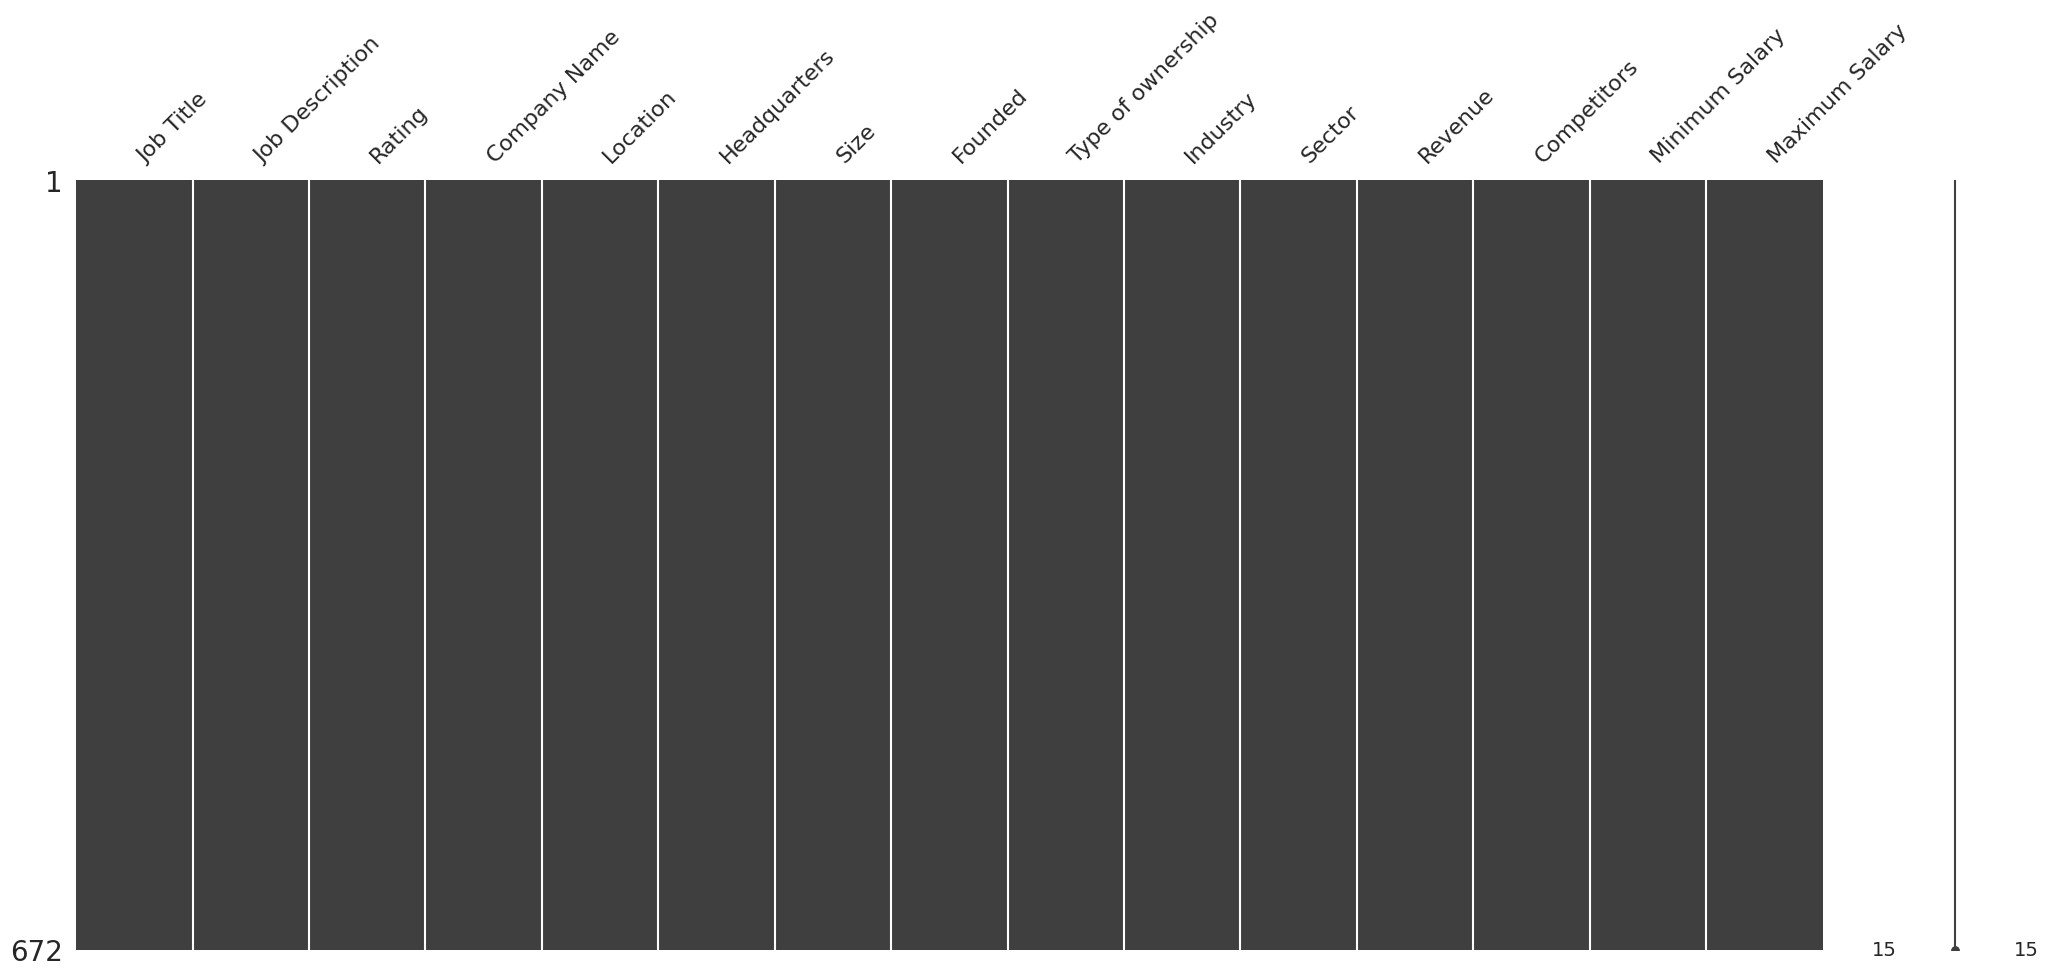

In [ ]:
msno.matrix(data1)
plt.show()

In [ ]:
data2['Company Name'] = data2['Company Name'].str.rstrip('\n1234567890.')
data2['Company Name']

NameError: ignored

In [ ]:
data2.reset_index(drop = True)

In [ ]:
data2['Job Description']

In [ ]:
data2['Mean Salary'] = (data2['Maximum Salary']+data2['Minimum Salary'])/2
data2.head()